In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
## Drop Unnecessary Columns 

df_index.drop(columns=['Unnamed: 0', 'year','month'], inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
## Check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

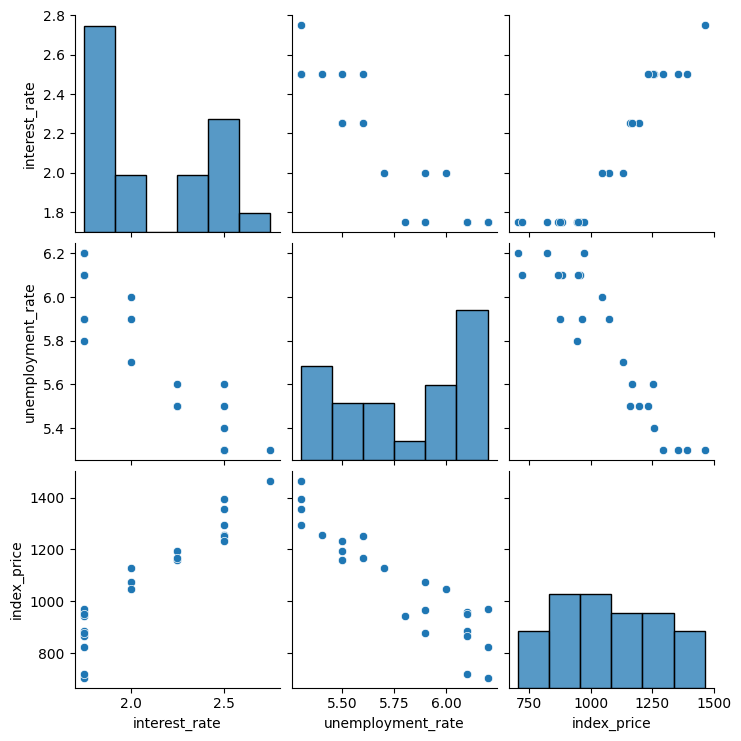

In [6]:
sns.pairplot(df_index)

### This clears that we need to use a Multiple Linear Regression

<Axes: >

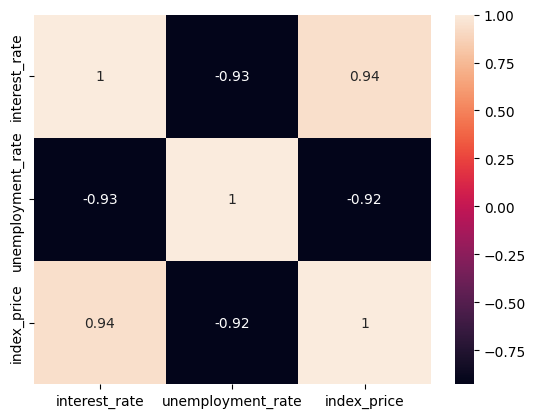

In [7]:
sns.heatmap(df_index.corr(), annot=True)

In [8]:
## Get Independent and Dependent Feature

X = df_index[['interest_rate', 'unemployment_rate']]
y = df_index['index_price']

In [9]:
## Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [10]:
## Standard scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
## Training the Linear Regression Model

from sklearn.linear_model import LinearRegression
regression = LinearRegression()


In [12]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
regression.coef_

array([  88.27275507, -116.25716066])

In [22]:
regression.intercept_

np.float64(1053.4444444444443)

In [ ]:
## Cross Validation 

from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv = 3)
validation_score ## This is the MSE of every fold 

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

High variation in CV scores means one or more of these is happening:
1. The model is too weak or wrong for the data
2. The data distribution changes across folds
3. The target has high noise / outliers
4. The dataset is small
5. Feature-target relationship is non-linear.  <br>
So don't blindly blame the data. Often the model choice is the real culprit.

In [14]:
y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [15]:
## Evaluation:- Evaluation is done on the Test data

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

In [16]:
mse, mae, r2, adjusted_r2

(5793.762887712569, 59.935781523235484, 0.8278978091457145, 0.7131630152428576)


# Assumptions 

#### Checking whether our trained model is performing well or not

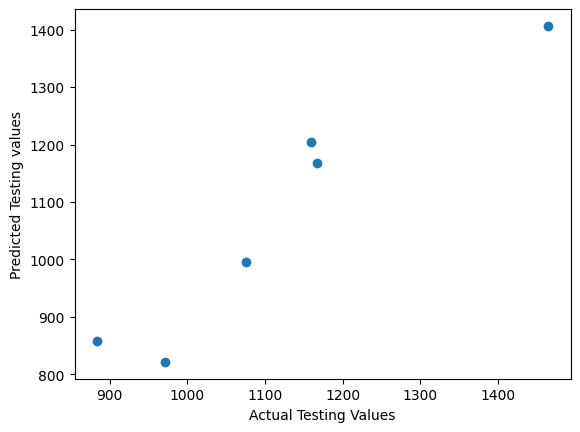

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Testing Values')
plt.ylabel('Predicted Testing values')
plt.show()

#### If there is a linear relationship between y_test and y_pred then the model had performed well 

In [18]:
residuals = y_test - y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

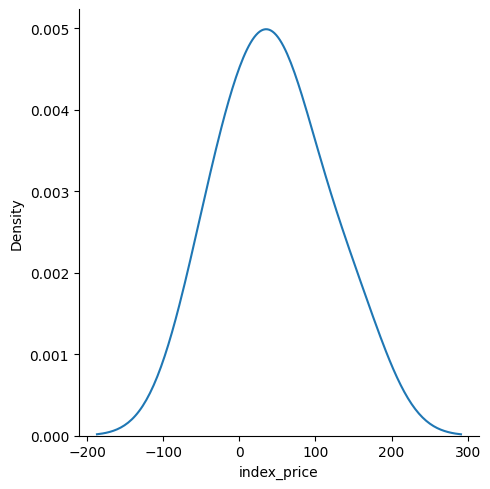

In [19]:
sns.displot(residuals, kind='kde')

#### If the residuals are following normal distributions then the model created is good

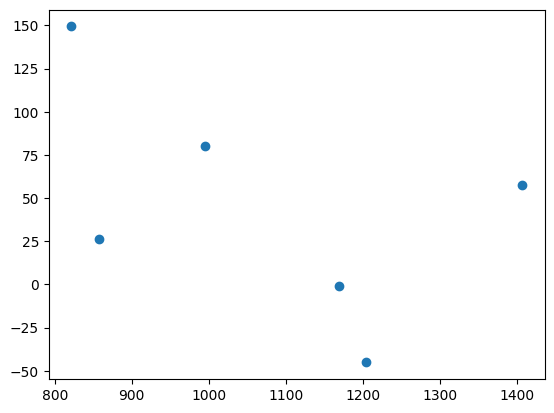

In [20]:
plt.scatter(y_pred, residuals)

#### If The graph between y_pred and residual does not follow any pattern then the model is good 